<a href="https://colab.research.google.com/github/DCM2002/Wordle-Tweet-Data-Analysis/blob/main/Wordle_Tweet_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import re #running regx for some of the data that we are going to get from the dataset

pd.set_option('display.max_columns', 500)

# For plotting
from itertools import cycle
plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])



##Load dataset

A new parser had to be added beacause of the The ParserError: Error tokenizing data. C error: EOF inside string starting at row 164714 indicates that there is an issue with the CSV file you're trying to read.
Specifically, it suggests that there is an unexpected end-of-file (EOF) within a string, which can happen if there are unescaped quotes or newlines within the data.
The python engine handles them better than C.

In [7]:
tweets = pd.read_csv('/content/tweets.csv', engine='python')


In [10]:
tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210


In [11]:
tweets['tweet_datetime']

,tweet_datetime
0,2022-01-16 03:20:43+00:00
1,2022-01-16 03:20:46+00:00
2,2022-01-16 03:20:55+00:00
3,2022-01-16 03:20:58+00:00
4,2022-01-16 03:21:00+00:00
...,...
234181,2022-02-26 03:27:52+00:00
234182,2022-02-26 03:27:57+00:00
234183,2022-02-26 03:27:57+00:00
234184,2022-02-26 03:28:00+00:00


In [12]:
tweets['wordle_id']

,wordle_id
0,Wordle 210
1,Wordle 210
2,Wordle 210
3,Wordle 210
4,Wordle 210
...,...
234181,Wordle 251
234182,Wordle 251
234183,Wordle 251
234184,Wordle 251


In [13]:
#make new columns

def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date #to get just the date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10] #since we just want 'Wordle 251'
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int') #casted into an integer
    tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')
    return tweets

tweets = process_tweets(tweets)

How many tweets for each day.

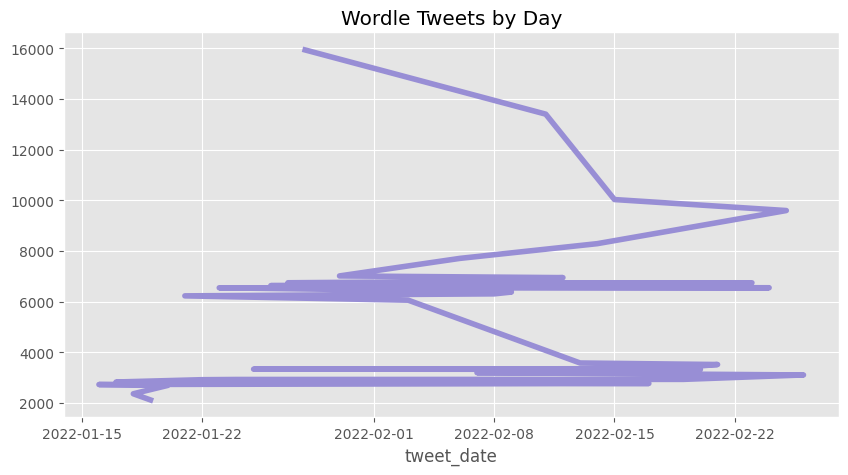

In [14]:
tweets['tweet_date'].value_counts() \
    .plot(figsize=(10, 5), title='Wordle Tweets by Day',
          color=color_pal[2], lw=4)
plt.show()

Number of Attempts analysed by Wordle ID


In [18]:
tweets.groupby('wordle_id')['n_attempts'].value_counts()

wordle_id  n_attempts
Wordle 21  4             10790
           3              8606
           5              6916
           6              2998
           2              2060
Wordle 22  4             25819
           3             19261
           5             17164
           6              7656
           2              5214
Wordle 23  4             22858
           5             17910
           3             15574
           6              8765
           2              4178
Wordle 24  4             13460
           5             11122
           3              9016
           6              6402
           2              2222
Wordle 25  4              5080
           5              4978
           6              2828
           3              2590
           2               719
Name: count, dtype: int64

In [21]:
tweets.groupby('wordle_id')['n_attempts'].value_counts() \
    .unstack() \
    .style.background_gradient(axis=1)

    #unstake- to flip the n of attempts so its the column now
    #axis will colour it

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 21,2060,8606,10790,6916,2998
Wordle 22,5214,19261,25819,17164,7656
Wordle 23,4178,15574,22858,17910,8765
Wordle 24,2222,9016,13460,11122,6402
Wordle 25,719,2590,5080,4978,2828


How many attempts does it ususally take to solve?

In [25]:
tweets['n_attempts'].value_counts()

,count
n_attempts,
4,78007
5,58090
3,55047
6,28649
2,14393


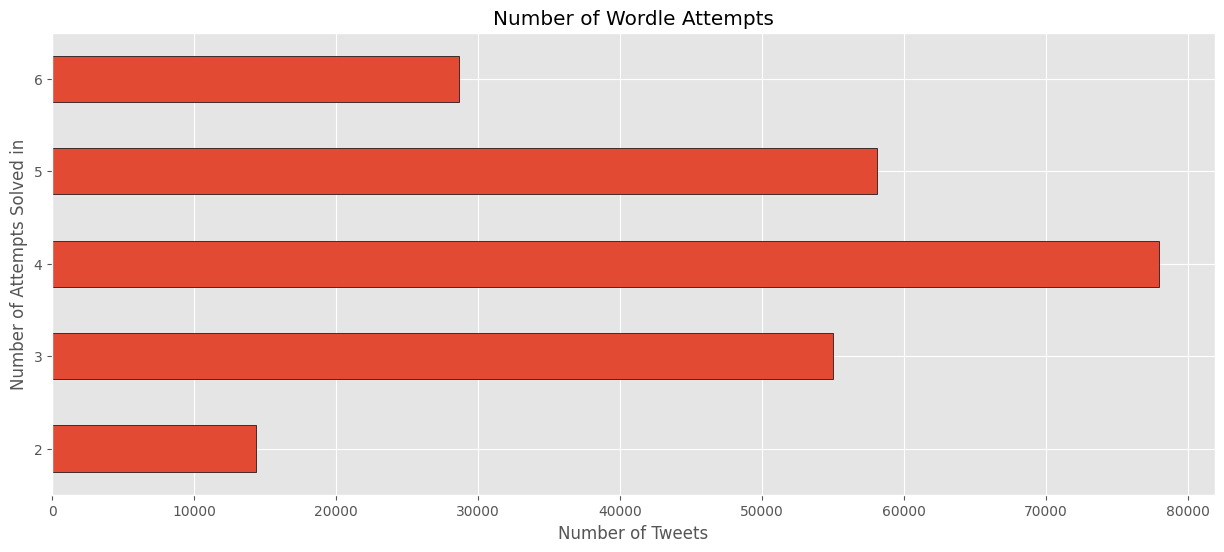

In [26]:
ax = tweets['n_attempts'].value_counts() \
    .sort_index() \
    .plot(figsize=(15, 6),
          kind='barh',
          title='Number of Wordle Attempts',
          edgecolor='black')
ax.set_xlabel('Number of Tweets')
ax.set_ylabel('Number of Attempts Solved in')
plt.show()